#  CNN개념이해_MNIST

* 본 파일은 GPU 런타임으로 연결됩니다.
* 경우에 따라서는 GPU 연결이 원할하지 않을 수도 있습니다.

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import cv2, os

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = ',')
    plt.plot(history['val_loss'], label='val_err', marker = ',')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [3]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

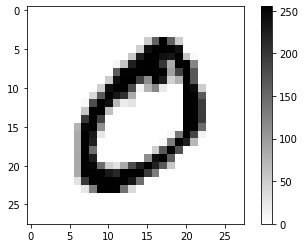

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

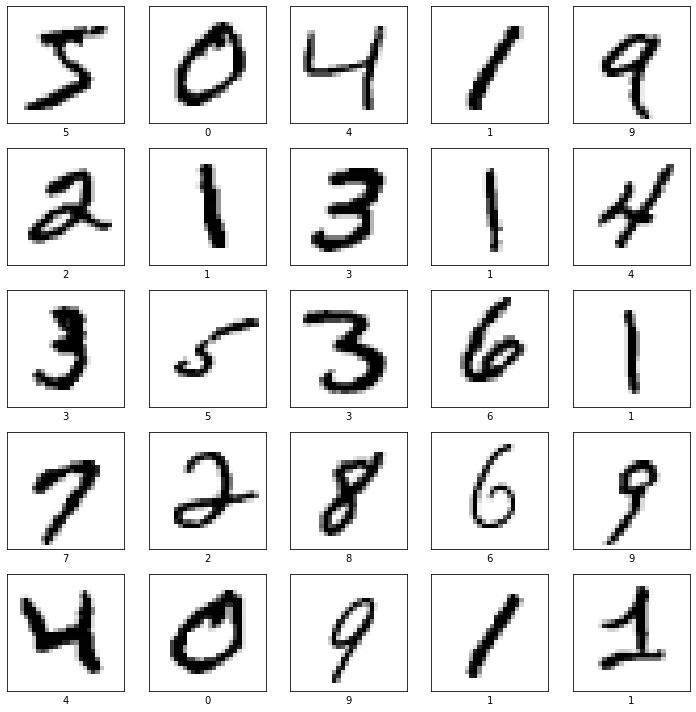

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

* CNN은 3차원 구조의 이미지(데이터셋은 4차원)를 입력해야 합니다.(input_shape)

In [8]:
x_train.shape, x_val.shape

((60000, 28, 28), (10000, 28, 28))

* reshape를 이용하여 다음과 같이 변환해 봅시다.
    * x_train.shape : (60000, 28, 28, 1)
    * x_val.shape : (10000, 28, 28, 1) 

In [9]:
x_train = x_train.reshape(60000,28,28,1)
x_val = x_val.reshape(10000,28,28,1)

* Scaling : Min-Max
    * 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
    * x_train, x_test를 그냥 255로 나누면 됨

In [10]:
x_train = x_train / 255.
x_test = x_val / 255.

## 5.CNN 기본 모델링

### (1) 모델 설계
* CNN 모델의 기본 구조
    * Conv2D  : 지역적인 특징 도출
    * MaxPooling : 요약
    * Flatten : 1차원으로 펼치기
    * Dense : Output Layer

In [11]:
clear_session()

model = Sequential([Conv2D(16, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same', strides = 1, activation='relu'),
                    MaxPooling2D(pool_size=(2, 2), strides=2),
                    Flatten(),
                    Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 10)                31370     
                                                                 
Total params: 31,530
Trainable params: 31,530
Non-trainable params: 0
_________________________________________________________________


### (2) 학습

In [12]:
history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 16s 3ms/step - loss: 0.3007 - val_loss: 0.1470
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1245 - val_loss: 0.1073
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0909 - val_loss: 0.0850
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0734 - val_loss: 0.0814
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0616 - val_loss: 0.0716
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0536 - val_loss: 0.0732
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0474 - val_loss: 0.0695
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0418 - val_loss: 0.0708
Epoch 9/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0366 - val_loss: 0.0713
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.03

### (3) 학습결과 그래프

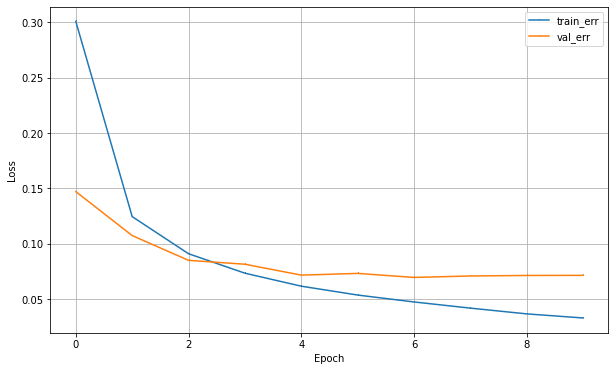

In [13]:
dl_history_plot(history)

### (4) 예측 및 평가

In [14]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 4ms/step


In [15]:
pred_1 = pred.argmax(axis=1)

In [16]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.6299
------------------------------------------------------------
[[ 850    0    0    1    0    0    2    0  127    0]
 [   0    0    0    4    1    0    0    0 1130    0]
 [   1    0  646    3    0    0    1    0  379    2]
 [   0    0    0  859    0    0    0    0  150    1]
 [   0    0    0    0  679    0    1    0  270   32]
 [   2    0    0   52    0   99    1    0  715   23]
 [   4    0    0    0    3    0  799    0  152    0]
 [   0    0    2   33    0    0    0  490  226  277]
 [   0    0    0    0    0    0    0    0  973    1]
 [   1    0    0    0    0    0    0    0  104  904]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       980
           1       0.00      0.00      0.00      1135
           2       1.00      0.63      0.77      1032
           3       0.90      0.85      0.88      1010
           4       0.99      0.69      0.82       982
           5   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 6.실습


### (1) 모델1
* 기본 모델링에서 다음을 조정해 봅시다.
    * Flatten 이후 Dense 레이어 추가(노드수 128)

| Layer (type) | Output Shape  | Param #   |
|---- |----|----|
| conv2d (Conv2D)  |  (None, 28, 28, 16) | 160       |
| max_pooling2d |  (None, 14, 14, 16) |      0         |
| flatten (Flatten) | (None, 3136)   |           0         |
| **dense (Dense)** |    **(None, 128)**   |            401536    |
| dense_1 (Dense) |    (None, 10)   |             1290     |

In [22]:
clear_session()

model = Sequential([Conv2D(16, kernel_size=(3, 3), input_shape=(28, 28, 1), padding='same', strides = 1, activation= 'relu' ),
                    MaxPooling2D(pool_size=(2, 2), strides=2),
                    Flatten(),
                    Dense( 128 , activation = 'relu' ),
                    Dense( 10 , activation= 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               401536    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 402,986
Trainable params: 402,986
Non-trainable params: 0
__________________________________________________

In [23]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 10,
                    validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1857 - val_loss: 0.0870
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0642 - val_loss: 0.0598
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0408 - val_loss: 0.0552
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0287 - val_loss: 0.0674
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0203 - val_loss: 0.0534
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0138 - val_loss: 0.0754
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0116 - val_loss: 0.0619
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0076 - val_loss: 0.0664
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0071 - val_loss: 0.0662
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.005

* 학습결과 그래프

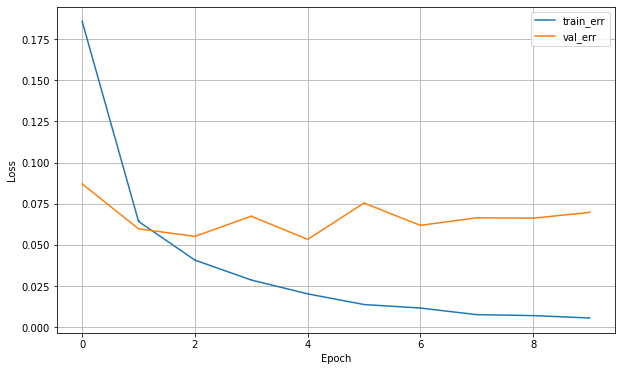

In [24]:
dl_history_plot(history)

* 예측 및 평가

In [25]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 4ms/step


In [26]:
pred_1 = pred.argmax(axis=1)

In [27]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.9658
------------------------------------------------------------
[[ 962    0    0    1    1    0    4    0    9    3]
 [   0 1065    6    1    1    0    1    0   61    0]
 [   1    0 1004    1    0    0    2    2   22    0]
 [   0    0    7  981    0    4    0    0   13    5]
 [   0    0    3    0  958    0    2    0    9   10]
 [   2    0    2    7    0  842    6    1   28    4]
 [   3    1    1    0    2    1  940    0   10    0]
 [   1    1   16    5    2    0    0  954   31   18]
 [   1    0    0    0    1    0    0    1  970    1]
 [   0    2    0    2    7    0    0    0   16  982]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       1.00      0.94      0.97      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.99      0.98      0.98       982
           5   

### (2) 모델2
* 모델1에 이어서 다음을 조정해 봅시다.
    * Convnet의 커널 수를 32로 늘려 봅시다.

| Layer (type) | Output Shape  | Param #   |
|---- |----|----|
| conv2d (Conv2D)  |  (None, 28, 28, **32**) | 320       |
| max_pooling2d |  (None, 14, 14, 32) |      0         |
| flatten (Flatten) | (None, 3136)   |           0         |
| dense (Dense) |    (None, 128)   |            802944        |
| dense_1 (Dense) |    (None, 10)   |             1290     |

In [33]:
clear_session()

model = Sequential([ Conv2D( 32 , kernel_size  =(3, 3), input_shape =( 28,28  ,1 ), padding='same', strides = 1, activation= 'relu' ),
                     MaxPooling2D(pool_size =(2, 2), strides=2),
                     Flatten(),
                     Dense(  128, activation = 'relu'  ),
                     Dense  (10, activation= 'softmax' )
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
__________________________________________________

In [34]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 10,
                    validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.1686 - val_loss: 0.0797
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0575 - val_loss: 0.0536
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0362 - val_loss: 0.0530
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0240 - val_loss: 0.0600
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0169 - val_loss: 0.0544
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0110 - val_loss: 0.0558
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0085 - val_loss: 0.0693
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0067 - val_loss: 0.0654
Epoch 9/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0073 - val_loss: 0.0585
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.004

* 학습결과 그래프

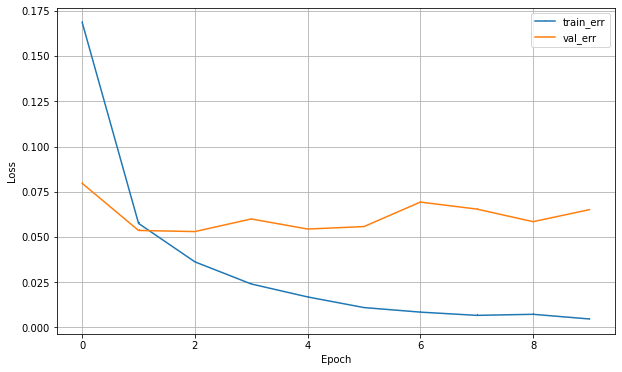

In [35]:
dl_history_plot(history)

* 예측 및 평가

In [36]:
pred = model.predict(x_val)

313/313 [==============================] - 2s 5ms/step


In [37]:
pred_1 = pred.argmax(axis=1)

In [38]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.9367
------------------------------------------------------------
[[965   0   0   1   0   0   8   0   6   0]
 [  0 879   4   4   0   0   3   0 245   0]
 [  7   2 975   0   2   0   5   1  40   0]
 [  1   0   1 985   0   3   0   0  16   4]
 [  0   0   0   0 959   0   4   0  10   9]
 [  8   0   0  16   0 800  16   1  51   0]
 [  5   1   0   0   1   1 941   0   9   0]
 [  2   1   9   7   5   0   0 919  59  26]
 [  3   0   0   0   0   0   1   0 969   1]
 [  3   2   0   3   5   1   0   0  20 975]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.77      0.87      1135
           2       0.99      0.94      0.96      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.90      0.94       892
           6       0.96      0.98      0.97       958
       

### (3) 모델3
* 모델2에 이어서, 아래 그림을 보고, 빠진 부분을 추가하시오.

![](https://github.com/DA4BAM/image/blob/main/cnn_mnist3.png?raw=true)

In [44]:
clear_session()

model = Sequential([ Conv2D( 32 , kernel_size  = (3, 3), input_shape =( 28, 28, 1), padding='same', activation = 'relu'),
                     MaxPooling2D(pool_size = (2, 2), strides=2),
                     Conv2D(64, kernel_size = (3, 3), padding='same', activation = 'relu'  ),
                    MaxPooling2D(pool_size =(2, 2), strides=2),
                    Flatten(),
                    Dense( 128 , activation = 'relu'),
                    Dense(10  , activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 10,
                    validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.1437 - val_loss: 0.0593
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0458 - val_loss: 0.0558
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0304 - val_loss: 0.0382
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0230 - val_loss: 0.0358
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0169 - val_loss: 0.0468
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0144 - val_loss: 0.0355
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0104 - val_loss: 0.0332
Epoch 8/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0083 - val_loss: 0.0424
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0079 - val_loss: 0.0471
Epoch 10/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.006

* 학습결과 그래프

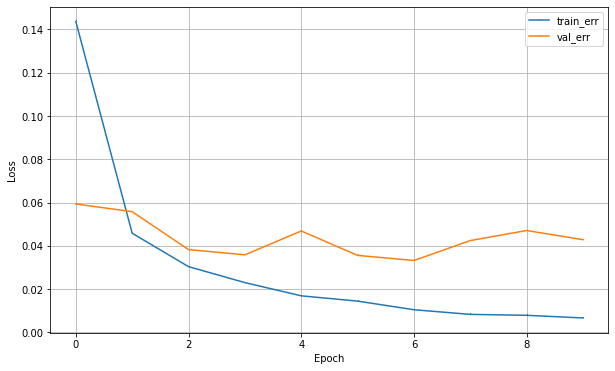

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred_1 = pred.argmax(axis=1)

In [ ]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

0.9894
------------------------------------------------------------
[[ 976    0    0    0    1    0    2    1    0    0]
 [   0 1122    4    5    0    0    3    0    1    0]
 [   0    0 1023    2    0    0    0    6    1    0]
 [   0    0    0 1004    0    3    0    1    2    0]
 [   0    0    0    0  975    0    0    1    0    6]
 [   0    0    0    3    0  888    1    0    0    0]
 [   3    1    0    0    2   14  936    0    2    0]
 [   0    1    7    1    0    0    0 1017    1    1]
 [   0    0    2    2    0    1    0    3  963    3]
 [   2    2    0    1    5    4    0    2    3  990]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5   

## 7.틀린그림 찾아보기
* 모델3의 결과에서 틀린 그림을 살펴 봅시다.
* 아래코드는 이해하기보다는 그냥 사용하기 바랍니다.

In [ ]:
idx = (y_val != pred_1)
x_val_wr = x_val[idx]
y_val_wr = y_val[idx]
pred_wr = pred_1[idx]

x_val_wr = x_val_wr.reshape(-1,28,28)
print(x_val_wr.shape)

In [ ]:
idx = rd.sample(range(x_val_wr.shape[0]),25)
x_temp = x_val_wr[idx]
y_temp = y_val_wr[idx]
p_temp = pred_wr[idx]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_temp[i], cmap=plt.cm.binary)
    plt.xlabel(f'actual : {y_temp[i]},  predict : {p_temp[i]}')
plt.tight_layout()
plt.show()

## 8.모델 저장하기

### (1) 모델 저장하기

In [ ]:
model.save('mnist_model.h5')

### (2) 모델 로딩하기

In [ ]:
from keras.models import load_model
model2 = load_model('mnist_model.h5')

* 불러온 모델 사용하기

In [ ]:
pred = model2.predict(x_val)

In [ ]:
pred_1 = pred.argmax(axis=1)

In [ ]:
print(accuracy_score(y_val,pred_1))
print('-'*60)
print(confusion_matrix(y_val, pred_1))
print('-'*60)
print(classification_report(y_val, pred_1))

## 9.진짜 손글씨로 예측해 봅시다.

* 이미지 처리를 위한 라이브러리와 함수 불러오기

In [18]:
import cv2
from google.colab.patches import cv2_imshow

* 그림판에서 그린 손글씨를 업로드 합니다.

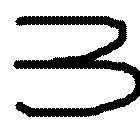

(140, 140)


In [19]:
# 파일 열기
img = cv2.imread('1.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
print(img.shape)

* 이미지 크기를 28, 28, 1 로 맞추기

In [20]:
# 크기 조절하기
img = cv2.resize(255-img, (28, 28))
print(img.shape)
cv2_imshow(img)

(28, 28)


* 예측하기

In [21]:
# 입력데이터 형식을 갖추기
test_num = img.reshape(1,28,28,1)

# 예측하기
pred = model.predict(test_num)
pred_1 = pred.argmax(axis=1)
print(pred_1)

1/1 [==============================] - 0s 41ms/step
[2]
